In [1]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the predictions
# teacher predictions
teacher_mcd_results = {'1': None, '10': None, '20': None, '30': None, '40': None, '50': None}
for k in teacher_mcd_results.keys():
    with open(f'../out/bert_teacher/final_hd020_ad030_cd020/results/results_{k}.json', 'r') as f:
        teacher_mcd_results[k] = json.load(f)
    
# student predictions
with open('../out/bert_student/m5_k10/e2/results/results.json', 'r') as f:
    student_mcd_results = json.load(f)

In [3]:
teacher_mcd_results

{'1': {'average_inference_time': 1.6593984078379973,
  'f1_score': 0.9794238683127572,
  'ece_score': 0.13953563714187292},
 '10': {'average_inference_time': 15.259651658803332,
  'f1_score': 0.9806013579049466,
  'ece_score': 0.14158328085500613},
 '20': {'average_inference_time': 29.825569978400843,
  'f1_score': 0.980106744298884,
  'ece_score': 0.14112831222080524},
 '30': {'average_inference_time': 45.28025688303724,
  'f1_score': 0.980106744298884,
  'ece_score': 0.14107339671719407},
 '40': {'average_inference_time': 60.97681429079339,
  'f1_score': 0.9798690274072277,
  'ece_score': 0.1418699780272447},
 '50': {'average_inference_time': 75.54866999279544,
  'f1_score': 0.9798690274072277,
  'ece_score': 0.1421563956960164}}

In [16]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["font.family"] = "serif"

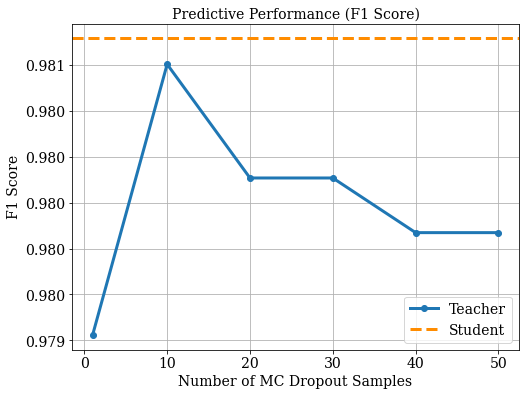

In [19]:
from matplotlib.ticker import StrMethodFormatter

# plot teacher f1 score vs k
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

# add grid
plt.grid(True)
teacher_f1 = [teacher_mcd_results[k]['f1_score'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_f1, 'o-', lw=3, label='Teacher')
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('F1 Score')
plt.title('Predictive Performance (F1 Score)')
# add student f1 score
plt.axhline(student_mcd_results['f1_score'], color='darkorange', linestyle='--', lw=3, label='Student')
plt.legend();

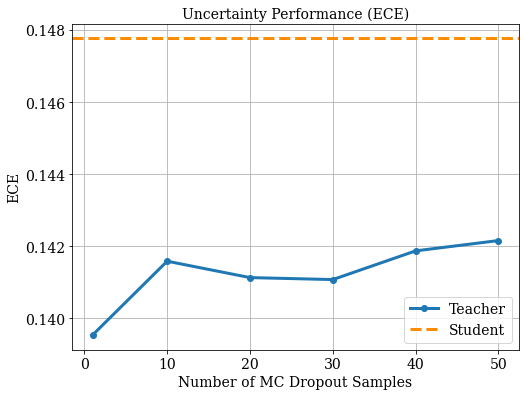

In [20]:
# plot teacher ece score vs k
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

# add grid
plt.grid(True)
teacher_f1 = [teacher_mcd_results[k]['ece_score'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_f1, 'o-', lw=3, label='Teacher')
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('ECE')
plt.title('Uncertainty Performance (ECE)')
# add student f1 score
plt.axhline(student_mcd_results['ece_score'], color='darkorange', linestyle='--', lw=3, label='Student')
plt.legend();